In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline
import sys,cv2
sys.path.append("/home/msmith/kaggle/cifar10/")
from unpickle import unpickle
data = unpickle("/home/msmith/kaggle/cifar10/cifar-10-batches-py/data_batch_1")
X, Y = data["data"], np.array(data["labels"])
X = X.reshape(-1,3,32,32).transpose(0,2,3,1)
ones= X[np.where(Y==1)] # cars

In [2]:
import fit

In [3]:
dataPaths = glob.glob("/home/msmith/kaggle/whale/imgs/*/w1S*")

In [4]:
feed = fit.feeder(dataPaths)
model = fit.tanh

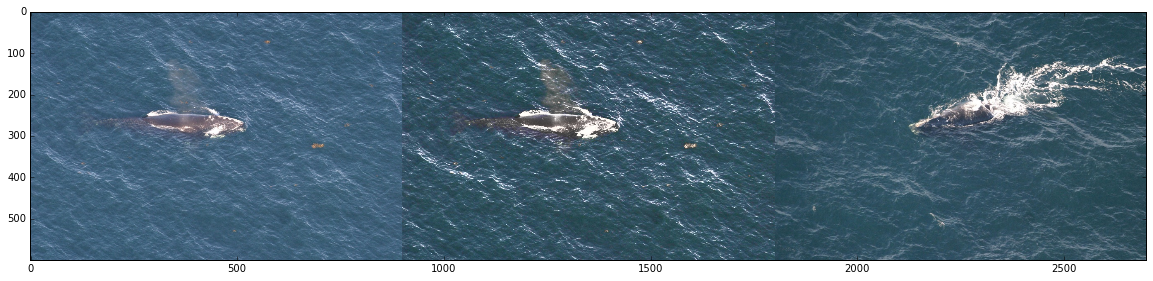

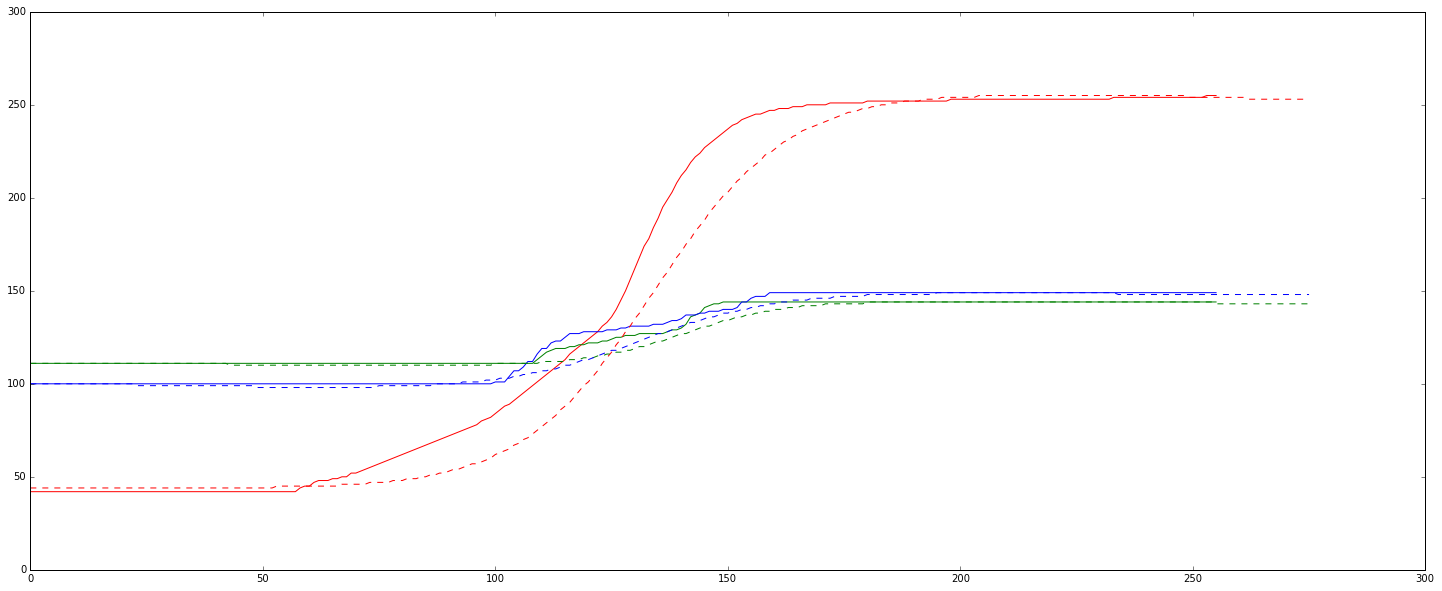

In [102]:
x, y, imgs = feed.next()
coeffs,fitted = fit.fitAllChannels(x,y)
plt.figure(figsize=(20,40))

from histMatch import histMatchAllChannels
trueDst, mappings = histMatchAllChannels(imgs[0],imgs[1])
plt.imshow(np.hstack((imgs[0],trueDst,imgs[1]))); plt.show()
plt.plot(mappings[0],"r")
plt.plot(mappings[1],"g")
plt.plot(mappings[2],"b")
YMap = (fitted["Y"]*255).clip(0,255).astype(np.uint8)
UMap = (fitted["U"]*255).clip(0,255).astype(np.uint8)
VMap = (fitted["V"]*255).clip(0,255).astype(np.uint8)
plt.plot(YMap,"r--")
plt.plot(UMap,"g--")
plt.plot(VMap,"b--")
plt.show()


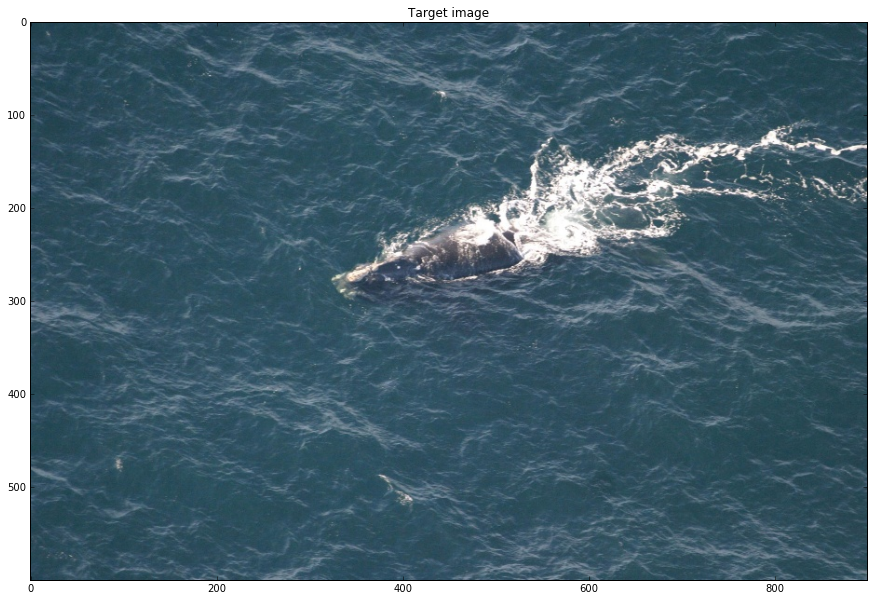

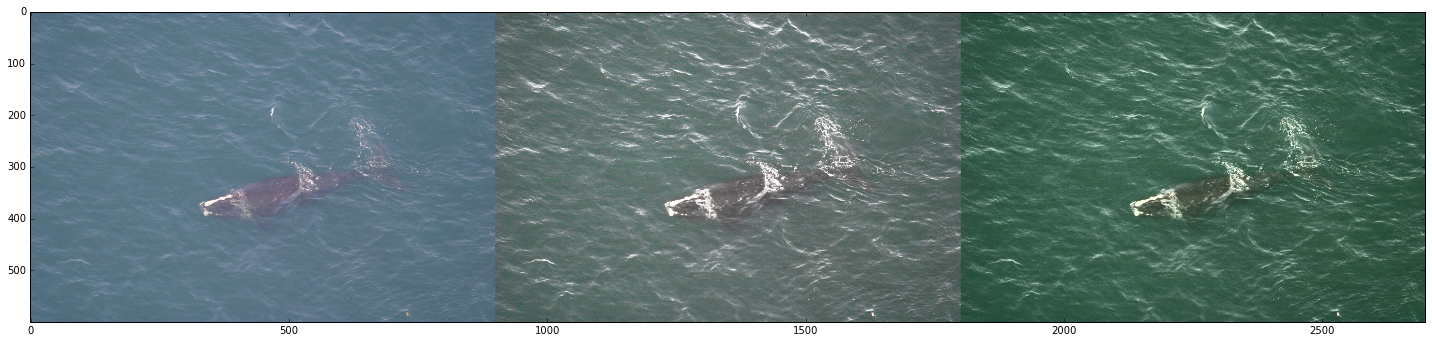

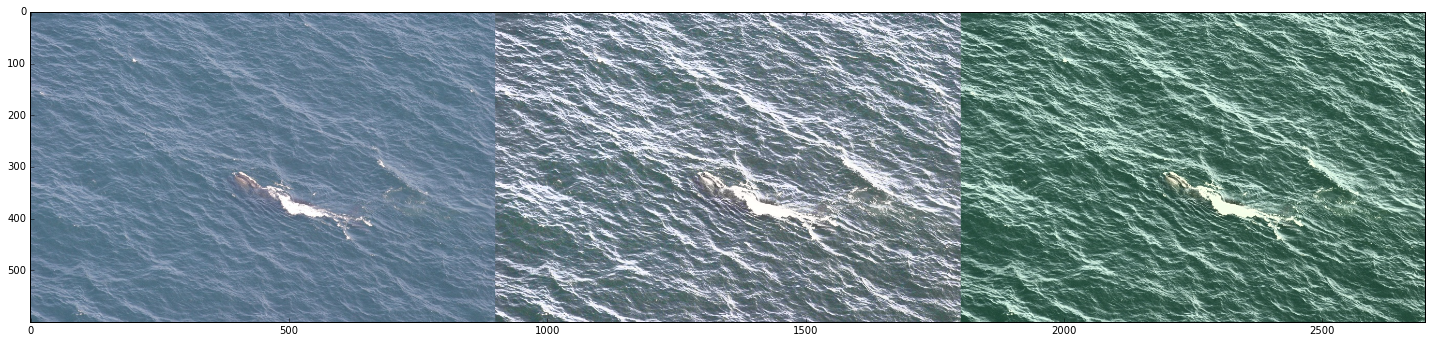

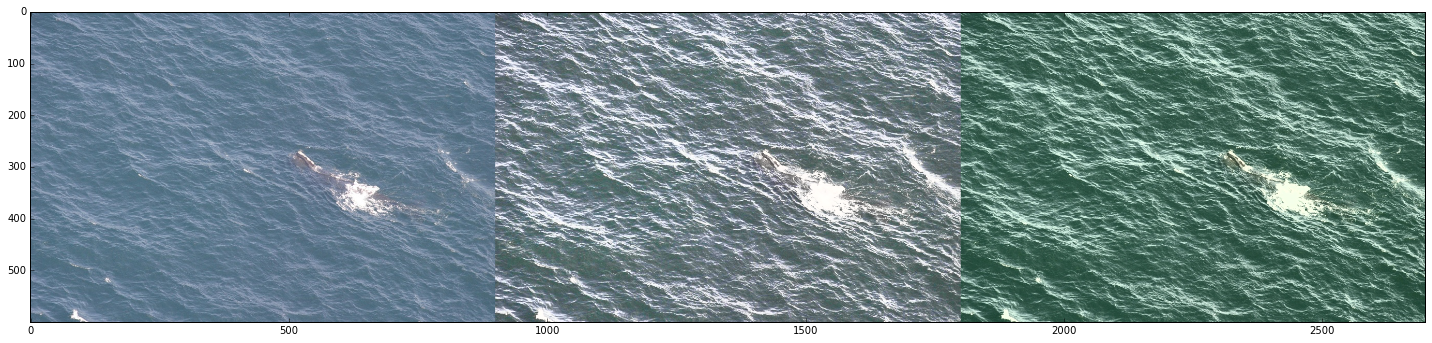

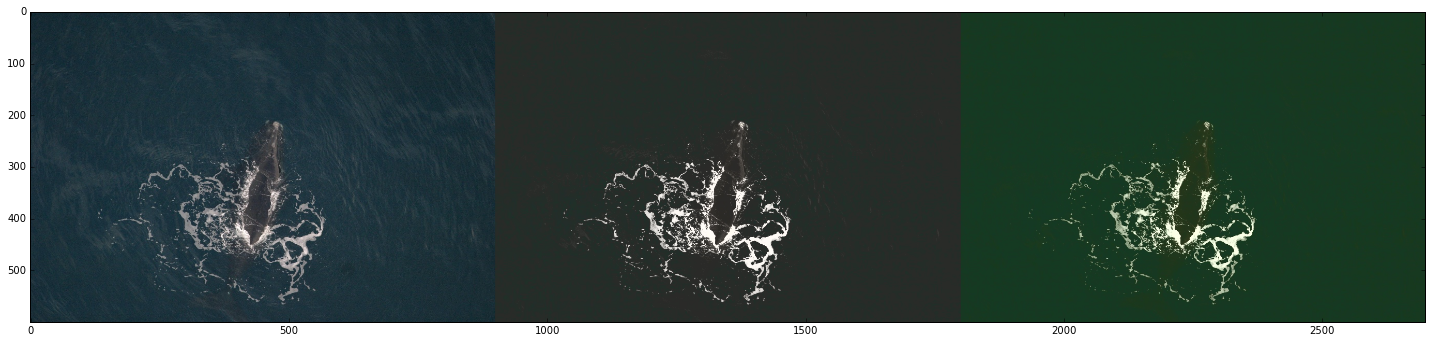

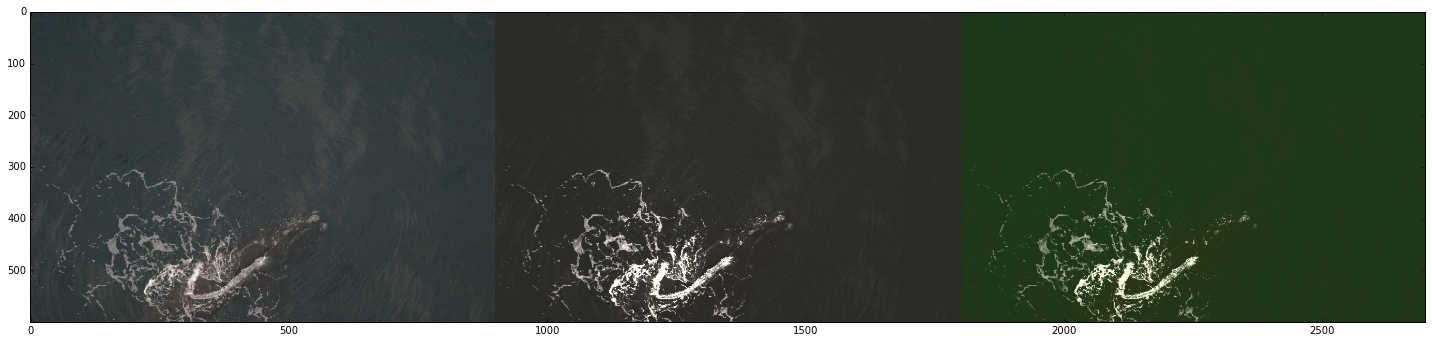

In [103]:
from histMatch import brgToYuv,yuvToBrg
import matplotlib.cm as cm
plt.imshow(imgs[1]); plt.title("Target image")
plt.show()
for i in xrange(5):
    src = cv2.imread(dataPaths[i])[:,:,::-1]
    srcYUV = brgToYuv(src)
    trueDst = np.zeros(src.shape)
    trueDst[:,:,0] = mappings[0].astype(np.uint8)[srcYUV[:,:,0]]
    trueDst[:,:,1] = mappings[1].astype(np.uint8)[srcYUV[:,:,1]]
    trueDst[:,:,2] = mappings[2].astype(np.uint8)[srcYUV[:,:,2]]
    dst = np.zeros(src.shape)
    dst[:,:,0] = YMap.astype(np.uint8)[srcYUV[:,:,0]]
    dst[:,:,1] = UMap.astype(np.uint8)[srcYUV[:,:,1]]
    dst[:,:,2] = VMap.astype(np.uint8)[srcYUV[:,:,2]]

    #Back to RGB
    trueDst = yuvToBrg(trueDst.astype(np.uint8))
    dst = yuvToBrg(dst.astype(np.uint8))
    plt.imshow(np.hstack((src,trueDst,dst)))
    plt.show()
